**Quantum Illumination with Non-Gaussian States - Coherent superposition of photon substraction and addition**

- Author: Longfei Fan
- Created Date: 09/01/2016
- Last Modified: 10/31/2016

# Code

In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import comb, factorial
from QI import *
## %matplotlib inline
np.set_printoptions(threshold='nan', precision=6, suppress=True)

### Optimal QCB for coherent superpostion of subtraction and addition

### Nth = 0.1

In [2]:
Nth = 0.1     # Average thermal photon numbers
N = 10        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter
print 's =', s

RA = np.linspace(0.07, 0.12, 21)
TB = np.linspace(0.1, 0.4, 21)
RA, TB = np.meshgrid(RA, TB)
qcb_pcs = []
for ra, tb in zip(np.ravel(RA), np.ravel(TB)):
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    rho_0 = RHO_0(p_cohe_sub_add, N, s, Nth, rt_list)
    rho_1 = RHO_1(p_cohe_sub_add, N, s, Nth, eta, rt_list)
    tr_sqrt = QCB(rho_0, rho_1, approx=True)
    qcb_pcs.append(tr_sqrt)
qcb_pcs = np.array(qcb_pcs)
qcb_pcs = qcb_pcs.reshape(RA.shape)

# save data to file
np.savez('pcs_opt', RA=RA, TB=TB, qcb_pcs=qcb_pcs)

s = 0.0998340788992


In [3]:
print RA.shape, TB.shape, qcb_pcs.shape

(21, 21) (21, 21) (21, 21)


In [4]:
data_qcb_opt = np.load('pcs_opt.npz')

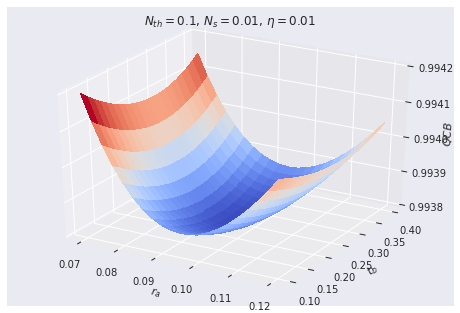

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA, TB, qcb_pcs, \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=0.1$, $N_s=0.01$, $\eta=0.01$')

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)

plt.show()

In [9]:
fig.savefig("QCB_N1e-1.png")

### Nth = 1

In [10]:
Nth = 1       # Average thermal photon numbers
N = 15        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter
print s

RA_1 = np.linspace(0.10, 0.14, 11)
TB_1 = np.linspace(0.1, 0.5, 11)
RA_1, TB_1 = np.meshgrid(RA_1, TB_1)
qcb_pcs_1 = []
for ra, tb in zip(np.ravel(RA_1), np.ravel(TB_1)):
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    rho_0 = RHO_0(p_cohe_sub_add, N, s, Nth, rt_list)
    rho_1 = RHO_1(p_cohe_sub_add, N, s, Nth, eta, rt_list)
    tr_sqrt = QCB(rho_0, rho_1, approx=True)
    qcb_pcs_1.append(tr_sqrt)
qcb_pcs_1 = np.array(qcb_pcs_1)
qcb_pcs_1 = qcb_pcs_1.reshape(RA_1.shape)
np.savez('pcs_opt_1', RA_1=RA_1, TB_1=TB_1, qcb_pcs_1=qcb_pcs_1)

0.0998340788992


In [11]:
print RA_1.shape, TB_1.shape, qcb_pcs_1.shape

(11, 11) (11, 11) (11, 11)


In [15]:
data_qcb_opt_1 = np.load('pcs_opt_1.npz')

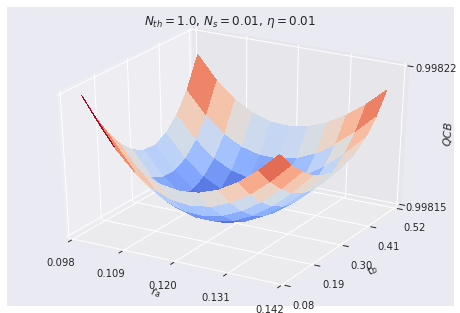

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(data_qcb_opt_1['RA_1'], data_qcb_opt_1['TB_1'], data_qcb_opt_1['qcb_pcs_1'], \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=1.0$, $N_s=0.01$, $\eta=0.01$')

# ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(2))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.5f'))

ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(5))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)

plt.show()

### Nth = 10

In [18]:
Nth = 10      # Average thermal photon numbers
N = 20        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter
print s

RA_10 = np.linspace(0.08, 0.16, 11)
TB_10 = np.linspace(0, 0.3, 11)
RA_10, TB_10 = np.meshgrid(RA_10, TB_10)
qcb_pcs_10 = []
for ra, tb in zip(np.ravel(RA_10), np.ravel(TB_10)):
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    rho_0 = RHO_0(p_cohe_sub_add, N, s, Nth, rt_list)
    rho_1 = RHO_1(p_cohe_sub_add, N, s, Nth, eta, rt_list)
    tr_sqrt = QCB(rho_0, rho_1, approx=True)
    qcb_pcs_10.append(tr_sqrt)
qcb_pcs_10 = np.array(qcb_pcs_10)
qcb_pcs_10 = qcb_pcs_10.reshape(RA_10.shape)
np.savez('pcs_opt_10', RA_10=RA_10, TB_10=TB_10, qcb_pcs_10=qcb_pcs_10)

0.0998340788992


In [19]:
print RA_10.shape, TB_10.shape, qcb_pcs_10.shape

(11, 11) (11, 11) (11, 11)


In [20]:
print [qcb_pcs_10[i][0] for i in xrange(11)]

[0.99386813617526559, 0.9938539739545742, 0.9938485692593293, 0.99385187877930725, 6.6585097095331174e+224, 0.99388451443142445, 0.99391380008112229, 0.9939517193396229, 0.99399827617697323, 0.9940534863119147, 0.99411737922213217]


In [21]:
print [qcb_pcs_10[4][i] for i in xrange(11)]

[6.6585097095331174e+224, 0.99372730404963727, 0.99363930654035937, 0.9935940024430111, 0.99358529718792121, 0.99360727307077967, 0.99365443121710706, 0.99372182101530815, 0.99380509163450714, 0.99390049223413335, 0.99400484050400628]


In [22]:
qcb_pcs_10[4][0] = 0.993861

In [23]:
print qcb_pcs_10

[[ 0.993868  0.993719  0.99362   0.993566  0.993551  0.993568  0.993611
   0.993676  0.993758  0.993853  0.993957]
 [ 0.993854  0.993709  0.993613  0.993562  0.993549  0.993568  0.993613
   0.99368   0.993763  0.993858  0.993963]
 [ 0.993849  0.993707  0.993614  0.993566  0.993555  0.993575  0.993621
   0.993689  0.993772  0.993868  0.993973]
 [ 0.993852  0.993713  0.993623  0.993576  0.993567  0.993588  0.993635
   0.993703  0.993786  0.993882  0.993987]
 [ 0.993861  0.993727  0.993639  0.993594  0.993585  0.993607  0.993654
   0.993722  0.993805  0.9939    0.994005]
 [ 0.993885  0.99375   0.993663  0.993619  0.993611  0.993633  0.993679
   0.993746  0.993829  0.993923  0.994026]
 [ 0.993914  0.993781  0.993695  0.993651  0.993643  0.993664  0.99371
   0.993776  0.993857  0.99395   0.994052]
 [ 0.993952  0.99382   0.993735  0.993691  0.993682  0.993702  0.993746
   0.99381   0.99389   0.993981  0.994081]
 [ 0.993998  0.993868  0.993782  0.993738  0.993727  0.993746  0.993788
   0.9938

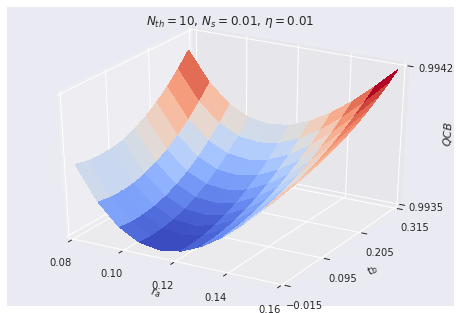

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA_10, TB_10, qcb_pcs_10, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=10$, $N_s=0.01$, $\eta=0.01$')

ax.set_xlim(0.08, 0.16)

ax.zaxis.set_major_locator(LinearLocator(2))
ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(4))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)

plt.show()